In [1]:
import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rcsetup
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

# rcsetup.defaultParams['font.size'][0] = 12
# rcsetup.defaultParams
# plt.style.available

In [2]:
names = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 
         'p8']
df = pd.read_csv('data/HTRU_2.csv', names=names+['cls'])
print(len(df))

17898


In [3]:
df0 = df[df['cls'] == 0]
df1 = df[df['cls'] == 1]
X = np.c_[tuple(df[n].values for n in names)]
X0 = np.c_[tuple(df0[n].values for n in names)]
X1 = np.c_[tuple(df1[n].values for n in names)]
Y = df['cls'].values
Y0 = df0['cls'].values
Y1 = df1['cls'].values

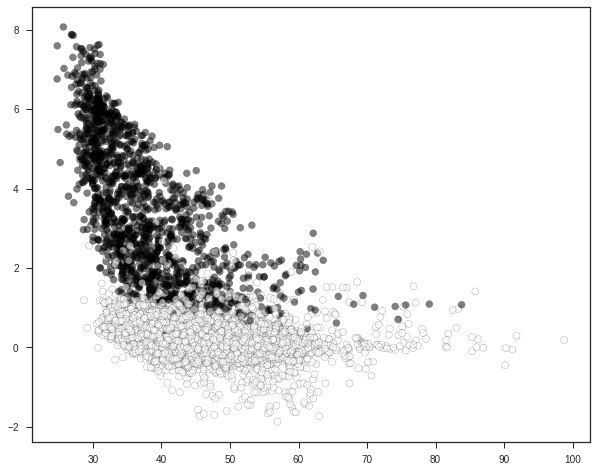

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(df['p2'].values, df['p3'].values, edgecolor='k', c=Y, alpha=0.5)
plt.show()

In [20]:
avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.5, func.Sqrt(0.1))))
# avg = averager_it(func.QuantileFunc(0.5, func.Sqrt(0.001)))
mlse = mls.MLocationScatterEstimator(avg, n_iter=20, h=0.1)
mlse.fit(X0)

[19.097711695016528, 17.937291583649834, 17.621642591997094, 17.51351909980726, 17.444063039895994, 17.452027222771658, 17.446904454240162, 17.449410463060733, 17.44715780541024, 17.448873219046476, 17.442957179136318, 17.447645170282392, 17.450375344495864, 17.448673566387487, 17.44060507426067, 17.437131306256646, 17.436062386202032, 17.44327186150676, 17.438180268094097, 17.438241970825192]


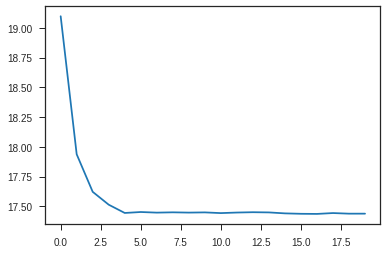

In [21]:
print(mlse.dvals)
plt.plot(mlse.dvals)
plt.show()

In [22]:
loc, sc = mlse.loc, mlse.S
distfunc = mlse.distfunc

In [23]:
loc, S = mlse.loc.base, mlse.S.base
distfunc = mlse.distfunc

loc0 = mls.standard_location(X0)
S0 = mls.standard_covariance(X0, loc0)
mls.scale_matrix(S0)
print(loc0)
print(loc)

[116.56272632  47.33974078   0.21044007   0.38084399   8.86325845
  23.28798388   8.86267372 113.62034366]
[116.80668775  47.41077122   0.20017191   0.27757462   2.69936171
  18.02577035   9.16138847 102.62693014]


In [24]:
distfunc = distance.MahalanobisDistance(np.linalg.inv(S))
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))

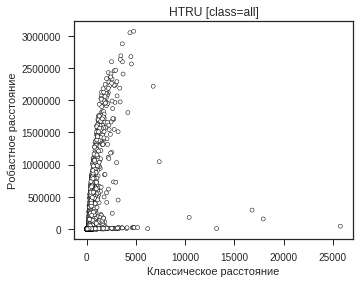

In [25]:
plt.figure(figsize=(5.0, 4.0))

D0 = [distfunc0(x, loc0) for x in X0]
D = [distfunc(x, loc) for x in X0]
plt.scatter(D0, D, c=Y0, edgecolor='k', linewidth=0.5,s=16)
plt.xlabel('Классическое расстояние')
plt.ylabel('Робастное расстояние')
plt.title('HTRU [class=all]')
# plt.ylim(0,0.2*10**7)
plt.savefig('fig/robust_clustering_elipse_htru_1.eps')
plt.show()

In [26]:
with np.printoptions(precision=1):
    print(distfunc.S.base)

[[ 2.7e-02  7.9e-03  1.2e+00  1.3e-01 -5.7e-02  1.4e-02 -4.1e-02  1.8e-03]
 [ 7.9e-03  3.1e-01 -9.9e-01  2.5e+00  4.6e-03  1.6e-02 -1.1e-01  5.6e-03]
 [ 1.2e+00 -9.9e-01  1.0e+02 -1.6e+01 -4.8e+00  9.9e-01 -3.5e+00  1.2e-01]
 [ 1.3e-01  2.5e+00 -1.6e+01  2.9e+01  1.8e+00  2.4e-02 -5.3e-02  4.1e-02]
 [-5.7e-02  4.6e-03 -4.8e+00  1.8e+00  6.9e+01 -1.0e+01  5.8e+01 -1.9e+00]
 [ 1.4e-02  1.6e-02  9.9e-01  2.4e-02 -1.0e+01  2.1e+00 -9.8e+00  3.8e-01]
 [-4.1e-02 -1.1e-01 -3.5e+00 -5.3e-02  5.8e+01 -9.8e+00  6.4e+01 -2.4e+00]
 [ 1.8e-03  5.6e-03  1.2e-01  4.1e-02 -1.9e+00  3.8e-01 -2.4e+00  9.3e-02]]
